# Numerov Method for Solving Schrodinger Equation

The differential equation is, 
$$ \frac{d^2y}{dx^2} = q(\lambda, x) y(x) + r(x) $$

Terms needed for solution:
$$ a = 2\left(1 + \frac{5h^2}{12}q(\lambda, x_{i-1})\right) $$
$$ b = -\left(1 - \frac{h^2}{12}q(\lambda, x_{i-2})\right) $$
$$ c = \frac{h^2}{12}\left(r(x_i) + 10 \, r(x_{i-1}) + r(x_{i-2})\right) $$
$$ d = 1 - \frac{h^2}{12}q(\lambda, x_i) $$

$$ y(x_i) = \frac{a}{d} y(x_{i-1}) + \frac{b}{d} y(x_{i-2}) + \frac{c}{d} $$

## Propagator with Numerov Method
Function: **`propNumerov`**

In [1]:
def propNumerov(pr, q, r, x, y, dx):
    '''
    q = q(lambda, x), r = r(x)
    x - x array of propagation
    y - y array of propagation
    yy - returned y array
    dx - increment along x axis
    '''
    N = len(x)
    yy = [y[i] for i in range(N)]
    for i in range(2,N):
        a = 2*(1 + 5*dx**2/12 * q(pr, x[i-1]))
        b = -(1 - dx**2/12 * q(pr, x[i-2]))
        c = dx**2/12 * (r(x[0]) + 10*r(x[i-1]) + r(x[i-2]))
        d = 1 - dx**2/12 * q(pr, x[i])
        yy[i] = a/d * yy[i-1] + b/d * yy[i-2] + c/d
    return yy

## Solving eigenvalue equation using Numerov method
Function: **`NumerovEigVal`**

In [2]:
def NumerovEigVal(prMin, prMax, q, r, x0, y0, xN, yN, y1, dx, nodes, mxItr):
    '''
    prMin, prMax - lower and upper limit of eigenvalue
    q = q(lambda, x), r = r(x)
    x0, y0 - left boundary conditions
    xN, yN - right boundary conditions
    y1 - next y value after y0
    dx - increment along x axis
    nodes - no. of nodes of eigenvalue
    mxItr - maximum allowed iteration
    Return: pr, x, yy
    pr - value
    x - x array of solution
    yy = y array of solution
    '''
    N = int((xN-x0)/dx)
    dx = (xN - x0)/N
    x = [x0 + i*dx for i in range(N+1)]
    y = [0 for i in range(N+1)]  # zero list
    y[0], y[1], y[N] = y0, y1, yN
    itr = 0
    tol = 1e-6  # tolerance

    while abs(prMax-prMin) > tol and itr < mxItr:
        pr = 0.5*(prMin + prMax) # proceeding to bisection method
        yy = propNumerov(pr, q, r, x, y, dx)
        cnt = 0
        for i in range(1, N-2):
            if yy[i]*yy[i+1]<0:
                cnt += 1
        if cnt > nodes:
            prMax = pr
        elif cnt < nodes:
            prMin = pr
        else:
            if yy[N-1] > yN:
                prMin = pr
            elif yy[N-1] < yN:
                prMax = pr
        itr += 1
    if itr < mxItr:
        return pr, x, yy
    else:
        return None, None, None

### Normalization
Function: **`psiNorm(psi, dx)`**

In [3]:
import numpy as np
def psiNorm(psi, dx):
    N = len(psi)
    psi2 = [psi[i]**2 for i in range(N)]
    psi2arr = np.array(psi2)
    psimod2 = np.sum(psi2arr*dx)
    norm_psi = np.array(psi)/(psimod2)**0.5
    return norm_psi

In [4]:
print(f'propNumerov: {propNumerov.__doc__}')
print(f'\nNumerovEigVal: {NumerovEigVal.__doc__}')

propNumerov: 
    q = q(lambda, x), r = r(x)
    x - x array of propagation
    y - y array of propagation
    yy - returned y array
    dx - increment along x axis
    

NumerovEigVal: 
    prMin, prMax - lower and upper limit of eigenvalue
    q = q(lambda, x), r = r(x)
    x0, y0 - left boundary conditions
    xN, yN - right boundary conditions
    y1 - next y value after y0
    dx - increment along x axis
    nodes - no. of nodes of eigenvalue
    mxItr - maximum allowed iteration
    Return: pr, x, yy
    pr - value
    x - x array of solution
    yy = y array of solution
    


## Example 1
Differential Equation:
$$ \frac{d^2y}{dx^2} = -\lambda y(x) $$ 

Boundary Conditions:
$\quad y(0) = 0 \quad$ and $\quad y(2\pi) = 0$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

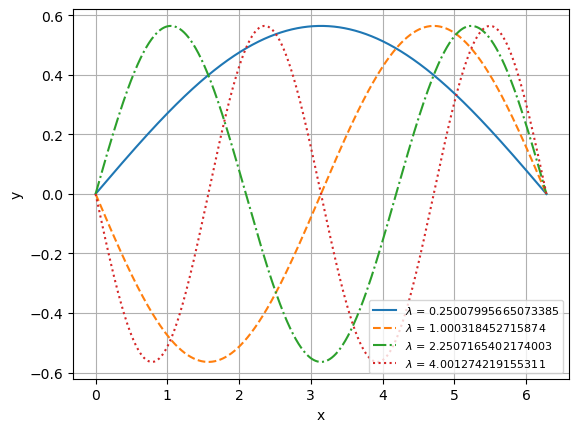

In [6]:
def q(lam, x):
    return -lam
def r(x):
    return 0

dx = 0.001
mxitr = 100
lmin, lmax = 0.1, 30
x0, y0, xN, yN = 0, 0, 2*np.pi, 0

sty = ['-', '--', '-.', ':']
for nodes in range(4):
    y1 = (-1)**nodes*1e-4
    lam, x, y = NumerovEigVal(lmin, lmax, q, r, x0, y0, xN, yN, y1, dx, nodes, mxitr)
    y = psiNorm(y, dx)
    plt.plot(x, y, sty[nodes], label=f'$\lambda$ = {lam}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best', prop={'size':8})
plt.grid()
plt.show()

## 1D potential box
$$ \frac{d^2\psi}{dx^2} = -\frac{2m_e}{\hbar^2} (E - V(x)) \psi(x) $$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

In [8]:
me = const.electron_mass
hcut = const.hbar
e = const.elementary_charge
eV = const.electron_volt
print(me, hcut)

9.1093837015e-31 1.0545718176461565e-34


In [9]:
L = 10e-15 # length

N = int((xN-x0)/dx)
dx = (xN - x0)/N
x = [x0 + i*dx for i in range(N+1)]
y = [0 for i in range(N+1)]  # zero list
y[0], y[1], y[N] = y0, y1, yN
mxitr = 100
lmin, lmax = 0.1e3*eV, 30e6*eV
x0, y0, xN, yN = 0, 0, L, 0
dx = 1e-18

# Potential
for i in range(N+1):
    if 0<x[i]<L:
        V = 0
    else:
        V = 1e10*eV # a large no.

def q(En, x):
    return -2*me/hcut**2 * (En - V)
def r(x):
    return 0

sty = ['-', '--', '-.', ':']
for nodes in range(4):
    y1 = (-1)**nodes*1e-18
    En, x, y = NumerovEigVal(lmin, lmax, q, r, x0, y0, xN, yN, y1, dx, nodes, mxitr)
    plt.plot(x, y, sty[nodes], label=f'$\lambda$ = {lam}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best', prop={'size':8})
    plt.grid()
plt.show()

UnboundLocalError: local variable 'pr' referenced before assignment